## Final Project Submission

Please fill out:
* Student name: Seyma Tas
* Student pace: full time
* Scheduled project review date/time: 
* Instructor name: Amber Yandow
* Blog post URL:


In [ ]:
Business questions


In [1]:
# Your code here - remember to use markdown cells for comments as well!
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set_style('darkgrid', {'axes.facecolor': '0.9'})

import warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv('TelcoCustomerChurnData.csv')

In [3]:
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
customerID          7043 non-null object
gender              7043 non-null object
SeniorCitizen       7043 non-null int64
Partner             7043 non-null object
Dependents          7043 non-null object
tenure              7043 non-null int64
PhoneService        7043 non-null object
MultipleLines       7043 non-null object
InternetService     7043 non-null object
OnlineSecurity      7043 non-null object
OnlineBackup        7043 non-null object
DeviceProtection    7043 non-null object
TechSupport         7043 non-null object
StreamingTV         7043 non-null object
StreamingMovies     7043 non-null object
Contract            7043 non-null object
PaperlessBilling    7043 non-null object
PaymentMethod       7043 non-null object
MonthlyCharges      7043 non-null float64
TotalCharges        7043 non-null object
Churn               7043 non-null object
dtypes: float64(1), int64(2), obj

In [5]:
df = df.drop(['customerID'], axis=1)

In [6]:
for col in df.columns:
    print ('\n',col)
    print ('-------------------')
    print (df[col].unique())


 gender
-------------------
['Female' 'Male']

 SeniorCitizen
-------------------
[0 1]

 Partner
-------------------
['Yes' 'No']

 Dependents
-------------------
['No' 'Yes']

 tenure
-------------------
[ 1 34  2 45  8 22 10 28 62 13 16 58 49 25 69 52 71 21 12 30 47 72 17 27
  5 46 11 70 63 43 15 60 18 66  9  3 31 50 64 56  7 42 35 48 29 65 38 68
 32 55 37 36 41  6  4 33 67 23 57 61 14 20 53 40 59 24 44 19 54 51 26  0
 39]

 PhoneService
-------------------
['No' 'Yes']

 MultipleLines
-------------------
['No phone service' 'No' 'Yes']

 InternetService
-------------------
['DSL' 'Fiber optic' 'No']

 OnlineSecurity
-------------------
['No' 'Yes' 'No internet service']

 OnlineBackup
-------------------
['Yes' 'No' 'No internet service']

 DeviceProtection
-------------------
['No' 'Yes' 'No internet service']

 TechSupport
-------------------
['No' 'Yes' 'No internet service']

 StreamingTV
-------------------
['No' 'Yes' 'No internet service']

 StreamingMovies
----------------

In [7]:
df.describe(percentiles=[0.1, 0.25, 0.50, 0.75, 0.90, 0.99]).round(2)

,SeniorCitizen,tenure,MonthlyCharges
count,7043.00,7043.00,7043.00
mean,0.16,32.37,64.76
std,0.37,24.56,30.09
min,0.00,0.00,18.25
10%,0.00,2.00,20.05
25%,0.00,9.00,35.50
50%,0.00,29.00,70.35
75%,0.00,55.00,89.85
90%,1.00,69.00,102.60
99%,1.00,72.00,114.73


In [8]:
df.isna().sum()

gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

In [9]:
(df.TotalCharges == " ").sum()


11

In [10]:
df = df[df['TotalCharges'] != " "]


In [11]:
df['TotalCharges'] = df['TotalCharges'].astype('float')

In [12]:
df['Churn'] = df['Churn'].map({'No': 0, 'Yes': 1})
# df['Churn'] = df['Churn'].apply(lambda x: 0 if x=='No' else 1)
# df['Churn'] = [1 if i=='Yes' else 0 for i in df['Churn']]

# Exploratory Data Analysis

## Visualizations

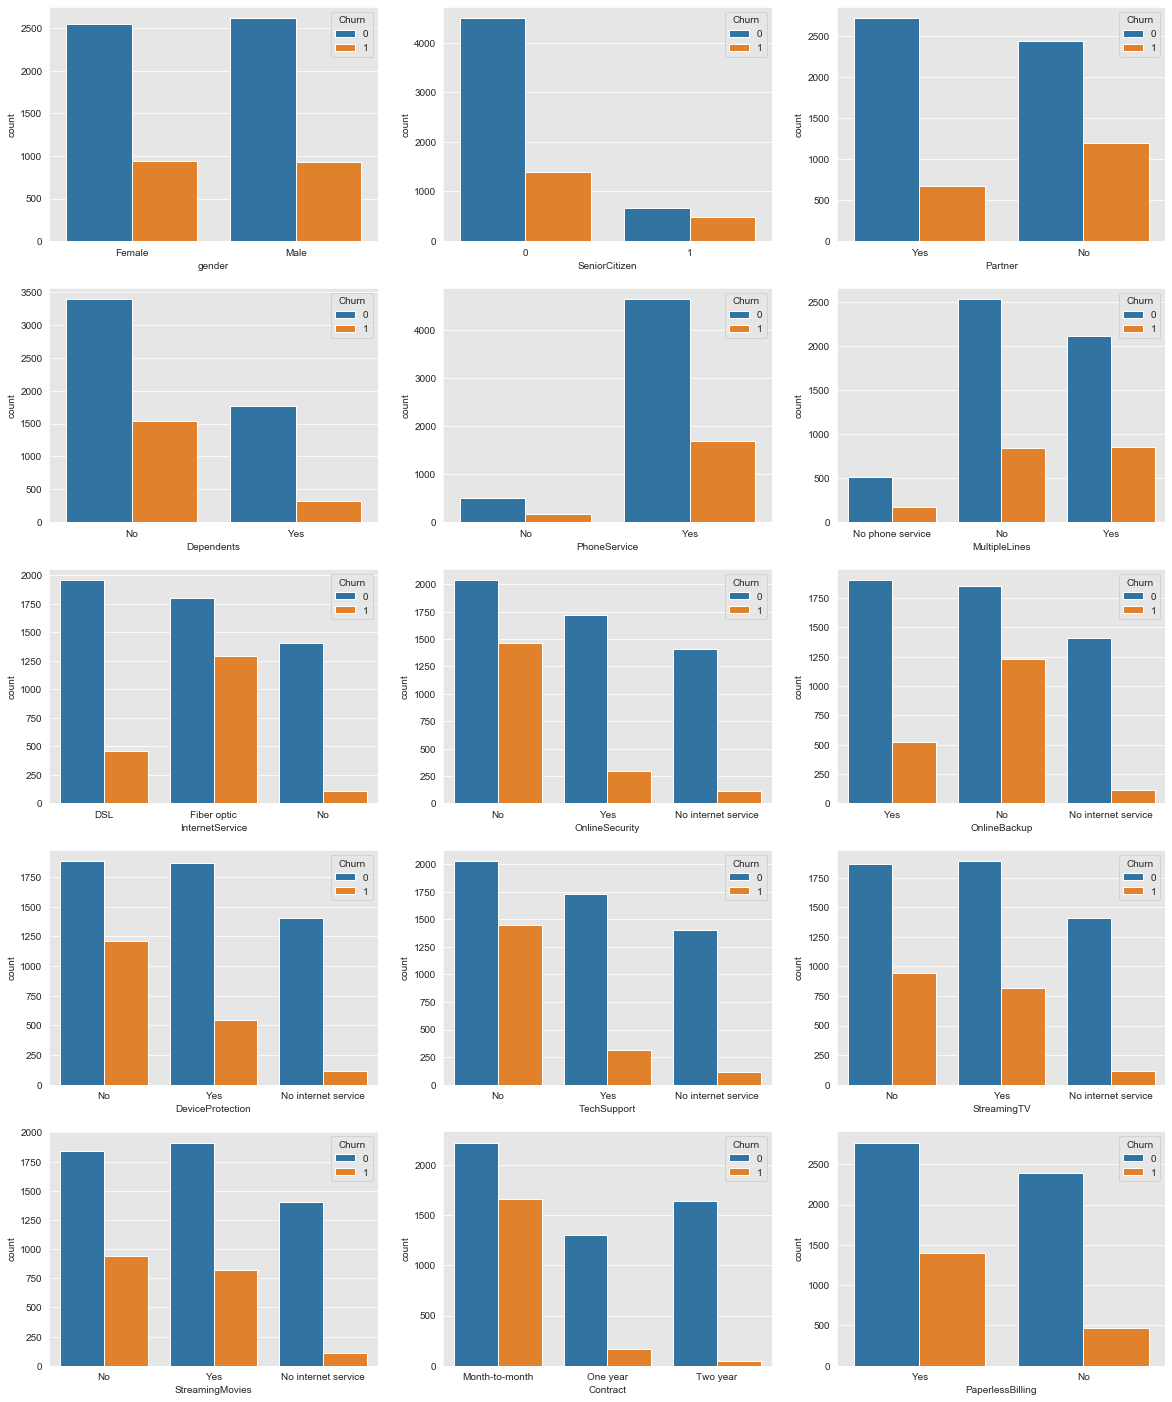

In [13]:
plt.figure(figsize=(20, 25))

plt.subplot(531)
sns.countplot(df['gender'],hue=df['Churn'])

plt.subplot(532)
sns.countplot(df['SeniorCitizen'],hue=df['Churn'])

plt.subplot(533)
sns.countplot(df['Partner'],hue=df['Churn'])

plt.subplot(534)
sns.countplot(df['Dependents'],hue=df['Churn'])

plt.subplot(535)
sns.countplot(df['PhoneService'],hue=df['Churn'])

plt.subplot(536)
sns.countplot(df['MultipleLines'],hue=df['Churn'])

plt.subplot(537)
sns.countplot(df['InternetService'],hue=df['Churn'])

plt.subplot(538)
sns.countplot(df['OnlineSecurity'],hue=df['Churn'])

plt.subplot(539)
sns.countplot(df['OnlineBackup'],hue=df['Churn'])

plt.subplot(5,3,10)
sns.countplot(df['DeviceProtection'],hue=df['Churn'])

plt.subplot(5, 3, 11)
sns.countplot(df['TechSupport'],hue=df['Churn'])

plt.subplot(5,3,12)
sns.countplot(df['StreamingTV'],hue=df['Churn'])

plt.subplot(5,3,13)
sns.countplot(df['StreamingMovies'],hue=df['Churn'])

plt.subplot(5,3,14)
sns.countplot(df['Contract'],hue=df['Churn'])

plt.subplot(5,3,15)
sns.countplot(df['PaperlessBilling'],hue=df['Churn'])

plt.show()

##### Analiyzing 'gender' column

Gender column has almost equal values of churn and not churn. It doesn't give information about the possibility if a customer is likely to churn. I decide to drop this column.

In [14]:
df['gender'].value_counts(normalize=True)

Male      0.504693
Female    0.495307
Name: gender, dtype: float64

In [15]:
df[df['Churn']=='No'].gender.value_counts(normalize=True)

Series([], Name: gender, dtype: float64)

In [16]:
df = df.drop(['gender'], axis=1)

##### Analiyzing 'PhoneService' column

The information included in the 'PhoneService' column is in the 'MultipleLines' column. I prefer to drop it too.

In [17]:
df = df.drop(['PhoneService'], axis=1)

##### Analyzing 'PaymentMethod' column

There is a big churn in the customers whose payment method is 'Electronic check'. They can be a young customer group who always try to find special offers.

In [18]:
df[df['Churn']=='No'].PaymentMethod.value_counts(normalize=True)

Series([], Name: PaymentMethod, dtype: float64)

In [19]:
df[df['Churn']=='Yes'].PaymentMethod.value_counts(normalize=True)

Series([], Name: PaymentMethod, dtype: float64)

In [20]:
df[df['PaymentMethod']=='Electronic check'].Churn.value_counts(normalize=True)

0    0.547146
1    0.452854
Name: Churn, dtype: float64

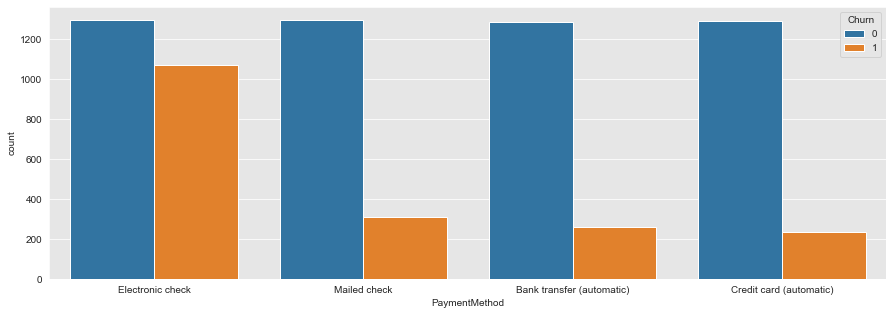

In [21]:
fig = plt.figure(figsize=(15, 5))
fig = sns.countplot(df['PaymentMethod'],hue=df['Churn'])

##### Analyzing Monthly charges column

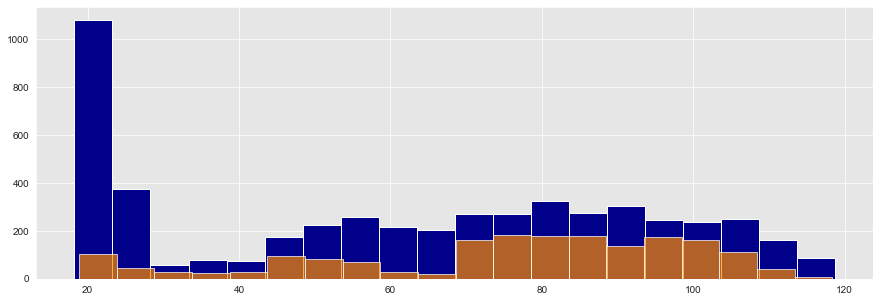

In [22]:
fig = plt.figure(figsize=(15, 5))
fig = df[df['Churn']==0].MonthlyCharges.hist(bins=20, color='darkblue', alpha=1)
fig = df[df['Churn']==1].MonthlyCharges.hist(bins=20, color='darkorange', alpha=0.7)

It is obvious in this histogram that when monthly charges are around 20-30 most customers don't churn. It is the best offer given by the companies. Churns increase when the bill is more than 70.

##### Analyzing 'TotalCharges' column

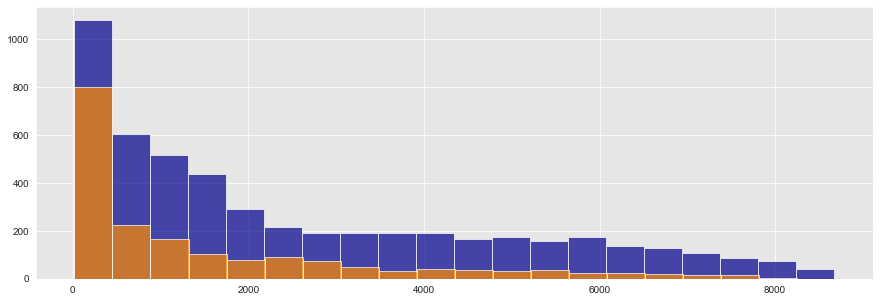

In [23]:
fig = plt.figure(figsize=(15, 5))
fig = df[df['Churn']==0].TotalCharges.hist(bins=20, color='darkblue', alpha=0.7)
fig = df[df['Churn']==1].TotalCharges.hist(bins=20, color='darkorange', alpha=0.7)

It can be misleading to think of this column as money. Instead it is needed to be thought as 'tenure' column. If you paid more it somehow means that you are a loyal customer.

##### Analyzing 'MonhtlyCharges' and 'TotalCharges' columns together

Of course, Monthly charge can not be more than total charge so top half of the graph is empty. There is a kind of collinearity between the to charges. But they tell us different things about the churn.

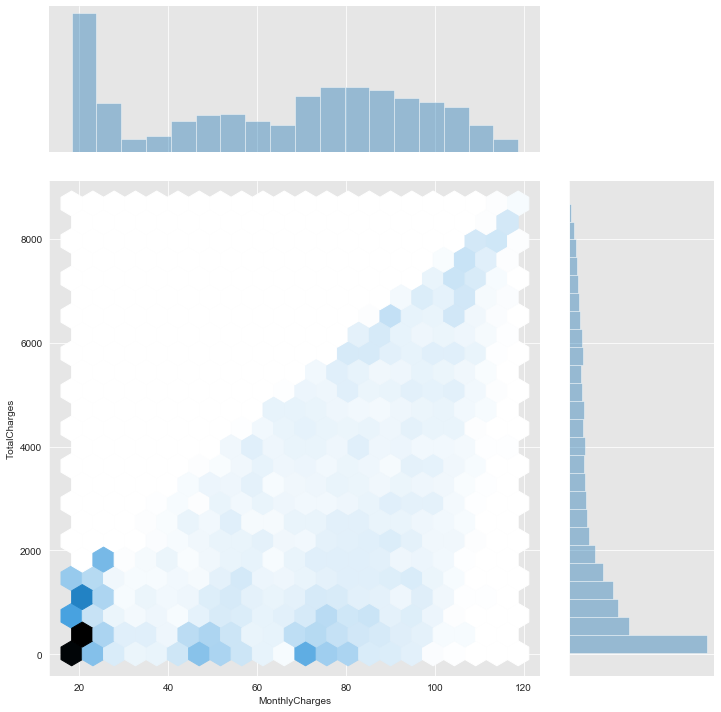

In [24]:
sns.jointplot(x='MonthlyCharges',y='TotalCharges', data=df, height= 10, ratio = 3, kind='hex');

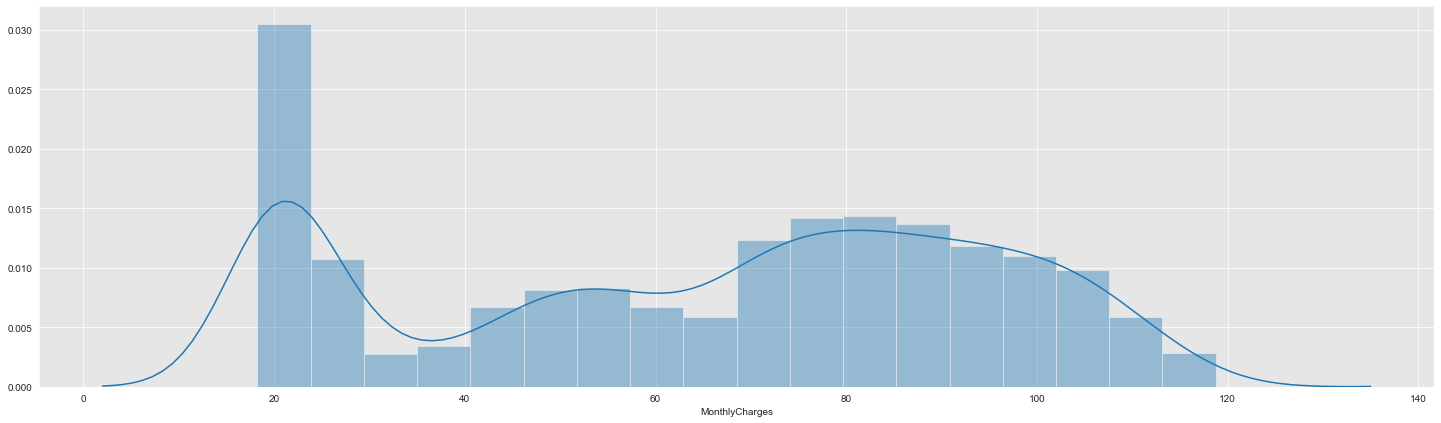

In [25]:
fig = plt.figure(figsize=(25, 7))
fig = sns.distplot(df['MonthlyCharges'])

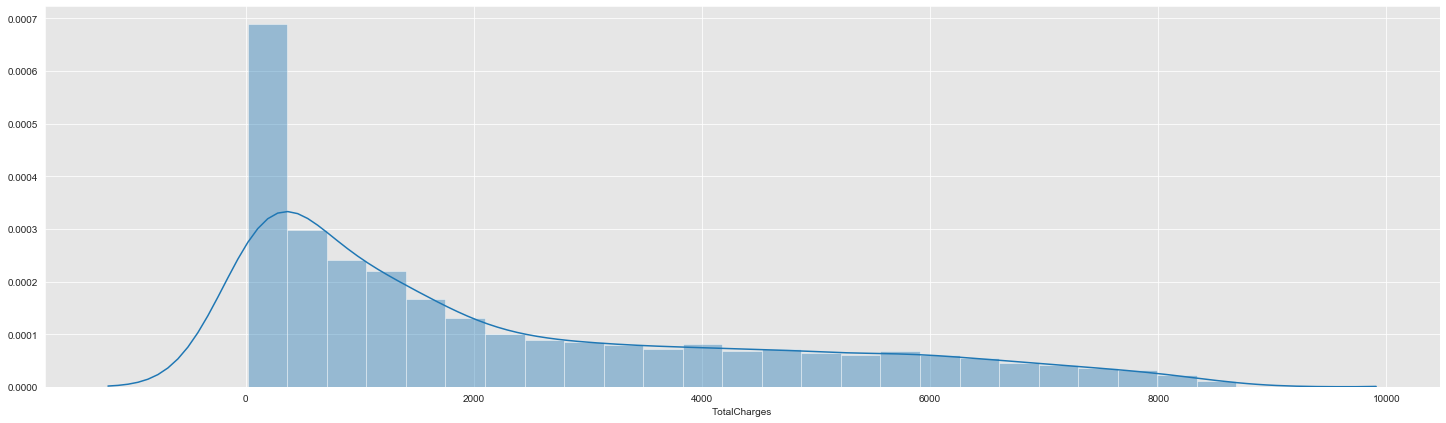

In [26]:
fig = plt.figure(figsize=(25, 7))
fig = sns.distplot(df['TotalCharges'])

##### Analyzing 'tenure' column

This column is showing us the loyal customers. These numbers are the months the customer is in the company. It is seen very well in this graph that new customers are more likely to churn.

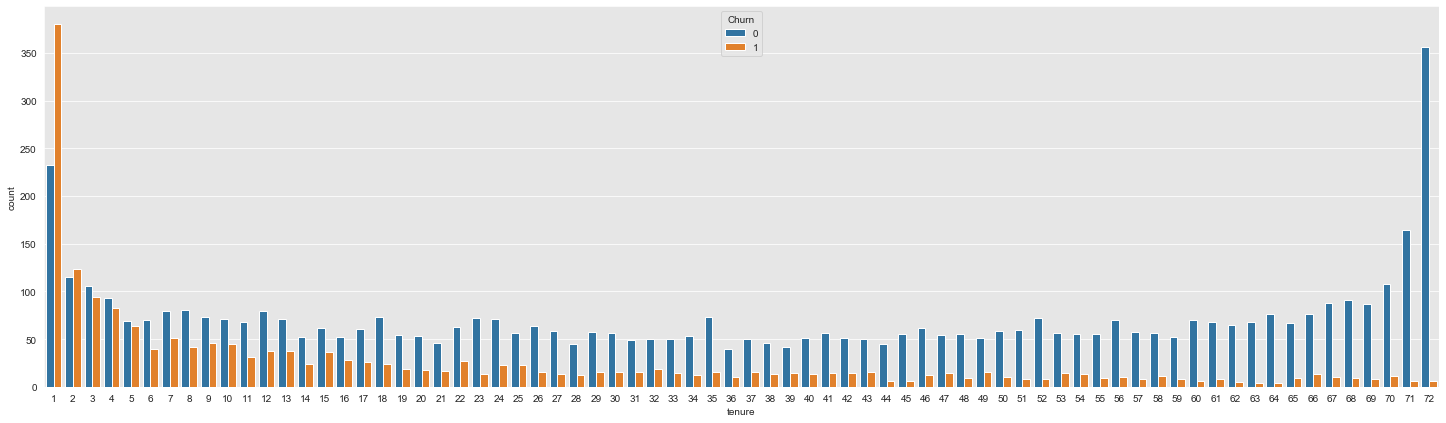

In [27]:
fig = plt.figure(figsize=(25, 7))
fig = sns.countplot(df['tenure'],hue=df['Churn'])

##### Analyzing 'StreamingTV' and 'StreamingMovies' Columns

These two columns are almost the same. I am going to drop 'StreamingMovies'

In [28]:
df.StreamingTV.value_counts(normalize=True)

No                     0.399460
Yes                    0.384386
No internet service    0.216155
Name: StreamingTV, dtype: float64

In [29]:
df.StreamingMovies.value_counts(normalize=True)

No                     0.395478
Yes                    0.388367
No internet service    0.216155
Name: StreamingMovies, dtype: float64

In [30]:
df[df['Churn']=='Yes'].StreamingTV.value_counts(normalize=True)

Series([], Name: StreamingTV, dtype: float64)

In [31]:
df[df['Churn']=='No'].StreamingTV.value_counts(normalize=True)

Series([], Name: StreamingTV, dtype: float64)

In [32]:
df[df['Churn']=='Yes'].StreamingMovies.value_counts(normalize=True)

Series([], Name: StreamingMovies, dtype: float64)

In [33]:
df[df['Churn']=='No'].StreamingMovies.value_counts(normalize=True)

Series([], Name: StreamingMovies, dtype: float64)

In [34]:
df = df.drop(['StreamingMovies'], axis=1)

##### Analyzing OnlineSecurity and TechSupport Columns

Like in 'StreamingMovies' and 'StreamingTV' these two columns are almost the same. I am going to drop 'OnlineSecurity' column

In [35]:
df.OnlineSecurity.value_counts(normalize=True)

No                     0.497298
Yes                    0.286547
No internet service    0.216155
Name: OnlineSecurity, dtype: float64

In [36]:
df.TechSupport.value_counts(normalize=True)

No                     0.493743
Yes                    0.290102
No internet service    0.216155
Name: TechSupport, dtype: float64

In [37]:
df[df['Churn']=='Yes'].OnlineSecurity.value_counts(normalize=True)

Series([], Name: OnlineSecurity, dtype: float64)

In [38]:
df[df['Churn']=='No'].OnlineSecurity.value_counts(normalize=True)

Series([], Name: OnlineSecurity, dtype: float64)

In [39]:
df[df['Churn']=='Yes'].TechSupport.value_counts(normalize=True)

Series([], Name: TechSupport, dtype: float64)

In [40]:
df[df['Churn']=='No'].TechSupport.value_counts(normalize=True)

Series([], Name: TechSupport, dtype: float64)

In [41]:
df = df.drop(['OnlineSecurity'], axis=1)

##### Heat map to analyze multicollinerity 

There is multicollinearity between 'InternetService', 'OnlineSecurity','OnlineBackup','DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies' columns. We can solve this by using Lasso algorithm.

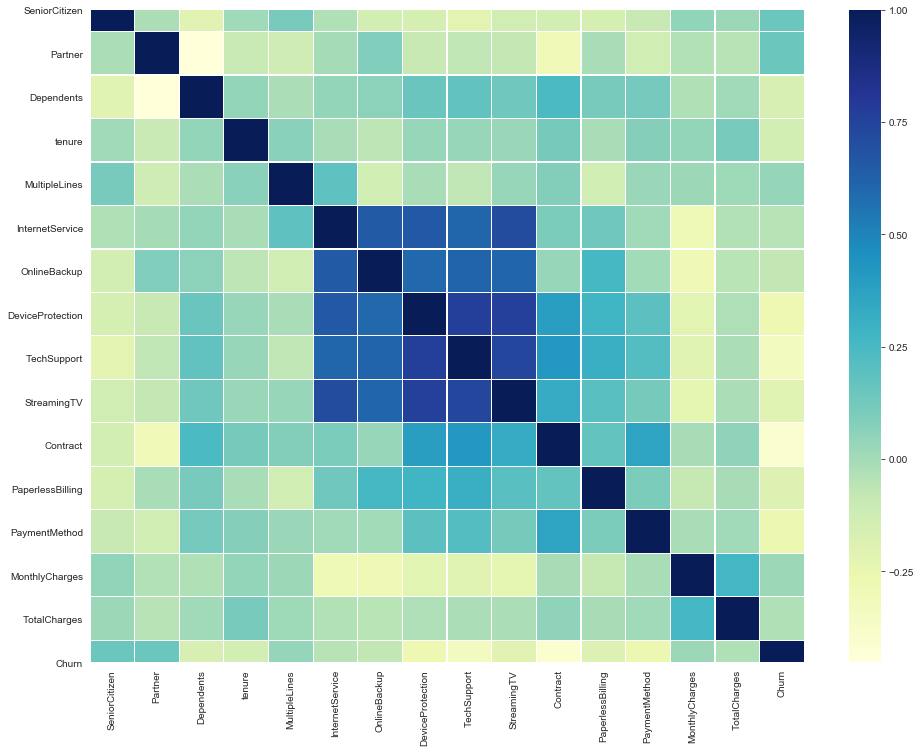

In [42]:
plt.figure(figsize=(16, 12))
corr = df.apply(lambda x: pd.factorize(x)[0]).corr()
ax = sns.heatmap(corr, xticklabels=corr.columns, yticklabels=corr.columns, 
                 linewidths=.2, cmap="YlGnBu")

### One hot encoding the categorical columns

In [43]:
df_ohe =pd.get_dummies(df, columns=['SeniorCitizen', 'Partner', 'Dependents', 
       'MultipleLines', 'InternetService', 'OnlineBackup','DeviceProtection', 
       'TechSupport', 'StreamingTV','Contract', 'PaperlessBilling', 'PaymentMethod'], drop_first=True)

In [44]:
df_ohe.head()

,tenure,MonthlyCharges,TotalCharges,Churn,SeniorCitizen_1,Partner_Yes,Dependents_Yes,MultipleLines_No phone service,MultipleLines_Yes,InternetService_Fiber optic,...,TechSupport_No internet service,TechSupport_Yes,StreamingTV_No internet service,StreamingTV_Yes,Contract_One year,Contract_Two year,PaperlessBilling_Yes,PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
0,1,29.85,29.85,0,0,1,0,1,0,0,...,0,0,0,0,0,0,1,0,1,0
1,34,56.95,1889.50,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,1
2,2,53.85,108.15,1,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,1
3,45,42.30,1840.75,0,0,0,0,1,0,0,...,0,1,0,0,1,0,0,0,0,0
4,2,70.70,151.65,1,0,0,0,0,0,1,...,0,0,0,0,0,0,1,0,1,0


### Saving the cleaned and one hot encoded data frame as a new data set.

In [49]:
df_ohe.to_csv("TelcoCustomerChurnData_cleaned_ohe.csv", index=False)

https://stats.idre.ucla.edu/other/mult-pkg/faq/general/faq-how-do-i-interpret-odds-ratios-in-logistic-regression/

https://www.analyticsvidhya.com/blog/2020/03/google-colab-machine-learning-deep-learning/

https://jamesrledoux.com/code/grid_search

In [47]:
# #Report for all the models  in a dataframe

# report_ = []
# lines = classification_report(test_Y, predictions).split('\n')
# for l in lines[2:-4]:
#     row_ = l.split()
#     if len(row_) != 0:
#         row = {}
#         row['precision'] = float(row_[-4])
#         row['recall'] = float(row_[-3])
#         row['f1_score'] = float(row_[-2])
#         row['support'] = float(row_[-1])
#         row['class'] = {1: "Churn", 0: "No Churn"}[int(row_[0])]
#         report_.append(row)
# dataframe = pd.DataFrame.from_dict(report_)
# dataframe.head()


https://www.kaggle.com/nicholasgah/churn-prediction-model-and-cap-curve

In [ ]:
df["Responsibility_Score"] = (df["Partner"] + df["Dependents"] + df["SeniorCitizen"]) / 3
df["Phone_Reliance"] = (df["PhoneService"] + df["MultipleLines"]) / 2
df["Support"] = (df["OnlineSecurity"] + df["OnlineBackup"] + df["DeviceProtection"] + df["TechSupport"]) / 4
df["Online_Services"] = (df["InternetService"] + df["StreamingTV"] + df["StreamingMovies"]) / 3
df["Duration"] = (df["tenure"] + df["Contract"]) / 2


In [ ]:

drop_cols = ["PaperlessBilling","Partner", "Dependents", "SeniorCitizen", "PhoneService", "MultipleLines",
            "OnlineSecurity", "OnlineBackup", "DeviceProtection", "TechSupport",
            "InternetService", "StreamingTV", "StreamingMovies",
            "tenure", "Contract"]
df = df.drop(drop_cols, axis=1)
df.head()
